# Test regresja wielomianowa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
dane = pd.read_csv('04_mieszkania_600.csv')
X = dane.iloc[:, 0:1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # kolumna ostatnia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Zamiana danych wejściowych na wielomiany
wiel = PolynomialFeatures(degree=4) # degree -> stopień wielomianu 
X_wiel = wiel.fit_transform(X_train) 

In [4]:
model = LinearRegression() 
model.fit(X_wiel, y_train)

LinearRegression()

In [5]:
prognoza = model.predict(wiel.fit_transform(X_test))

In [6]:
r2_score(y_test, prognoza)

0.5181716129678906

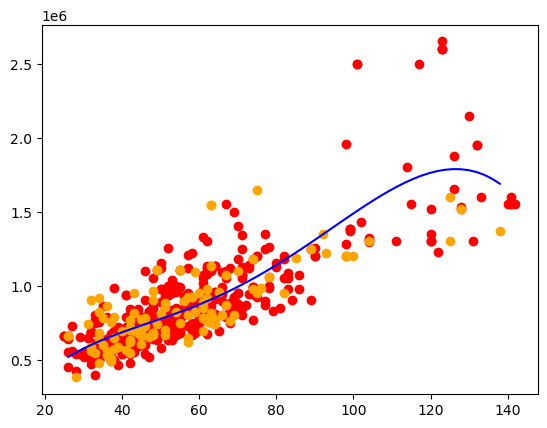

In [7]:
X_in = np.linspace(np.min(X_test), np.max(X_test), int((np.max(X_test)-np.min(X_test))/2))
X_in = X_in.reshape(-1, 1) 
X_wiel = wiel.fit_transform(X_in) 
prognoza = model.predict(X_wiel)

plt.scatter(X_train, y_train, c='red')
plt.scatter(X_test, y_test, c='orange')
plt.plot(X_in, prognoza, c='blue')
plt.show()